***Assignment_18_ANN***

***Akanksha C. Khandare***

In [2]:
!pip install scikeras


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:

# 2) Load dataset
data = pd.read_csv("Alphabets_data.csv")
print("Dataset shape:", data.shape)
print(data.head())

Dataset shape: (20000, 17)
  letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1       7      5      10  


In [3]:
# 3) Correct feature/target split (your target column is 'letter' at column 0)
target_col = 'letter'   # <--- correct target column name from your sample
if target_col not in data.columns:
    # fallback: if target not found, assume first column is target
    target_col = data.columns[0]
print("Using target column:", target_col)


Using target column: letter


In [4]:

X = data.drop(columns=[target_col])
y = data[target_col]

In [5]:
# 4) Encode labels
le = LabelEncoder()
y_enc = le.fit_transform(y)
class_names = le.classes_
print("Classes:", class_names)

Classes: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


In [6]:
# 5) Check features (all numeric here) and scale
print("\nFeature dtypes:\n", X.dtypes)
# Fill missing (none expected)
X = X.fillna(X.mean())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Feature dtypes:
 xbox      int64
ybox      int64
width     int64
height    int64
onpix     int64
xbar      int64
ybar      int64
x2bar     int64
y2bar     int64
xybar     int64
x2ybar    int64
xy2bar    int64
xedge     int64
xedgey    int64
yedge     int64
yedgex    int64
dtype: object


In [7]:

# 6) Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (16000, 16) Test shape: (4000, 16)


In [8]:
# 7) Utility: build model function
def build_model(input_dim, num_classes, neurons=64, activation='relu', dropout_rate=0.3, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_dim=input_dim))
    model.add(Dropout(dropout_rate))
    # optional second layer: half neurons
    model.add(Dense(max(8, neurons // 2), activation=activation))
    model.add(Dropout(dropout_rate*0.5))
    model.add(Dense(num_classes, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:

input_dim = X_train.shape[1]
num_classes = len(class_names)

In [10]:
# 8) Train a baseline model
print("\nTraining baseline model...")
baseline = build_model(input_dim, num_classes, neurons=64, activation='relu', dropout_rate=0.3, learning_rate=0.001)
es = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
hist_base = baseline.fit(X_train, y_train, validation_split=0.15, epochs=50, batch_size=32, callbacks=[es], verbose=2)


Training baseline model...


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
425/425 - 4s - 10ms/step - accuracy: 0.2996 - loss: 2.3784 - val_accuracy: 0.6179 - val_loss: 1.4095
Epoch 2/50
425/425 - 2s - 4ms/step - accuracy: 0.5315 - loss: 1.4977 - val_accuracy: 0.7071 - val_loss: 1.0456
Epoch 3/50
425/425 - 2s - 4ms/step - accuracy: 0.5962 - loss: 1.2870 - val_accuracy: 0.7546 - val_loss: 0.8965
Epoch 4/50
425/425 - 2s - 4ms/step - accuracy: 0.6388 - loss: 1.1561 - val_accuracy: 0.7771 - val_loss: 0.8102
Epoch 5/50
425/425 - 2s - 4ms/step - accuracy: 0.6631 - loss: 1.0772 - val_accuracy: 0.7883 - val_loss: 0.7555
Epoch 6/50
425/425 - 2s - 4ms/step - accuracy: 0.6740 - loss: 1.0342 - val_accuracy: 0.8067 - val_loss: 0.7153
Epoch 7/50
425/425 - 2s - 4ms/step - accuracy: 0.6852 - loss: 0.9889 - val_accuracy: 0.8096 - val_loss: 0.6743
Epoch 8/50
425/425 - 2s - 4ms/step - accuracy: 0.7010 - loss: 0.9508 - val_accuracy: 0.8217 - val_loss: 0.6465
Epoch 9/50
425/425 - 2s - 4ms/step - accuracy: 0.7123 - loss: 0.9180 - val_accuracy: 0.8283 - val_loss: 0.6232


In [11]:
# baseline evaluation
y_pred_base = np.argmax(baseline.predict(X_test), axis=1)
base_acc = accuracy_score(y_test, y_pred_base)
print("\nBaseline accuracy:", base_acc)
print("\nBaseline classification report:")
print(classification_report(y_test, y_pred_base, target_names=class_names, zero_division=0))


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step   

Baseline accuracy: 0.88975

Baseline classification report:
              precision    recall  f1-score   support

           A       0.95      0.92      0.94       158
           B       0.76      0.90      0.82       153
           C       0.94      0.91      0.92       147
           D       0.86      0.89      0.88       161
           E       0.80      0.90      0.85       154
           F       0.92      0.83      0.87       155
           G       0.85      0.88      0.86       155
           H       0.88      0.71      0.79       147
           I       0.95      0.84      0.89       151
           J       0.91      0.91      0.91       149
           K       0.86      0.93      0.90       148
           L       0.96      0.88      0.92       152
           M       0.96      0.94      0.95       158
           N       0.95      0.87      0.91       157
           O       0.86      0.92      0.89       150
           P       0.92      0

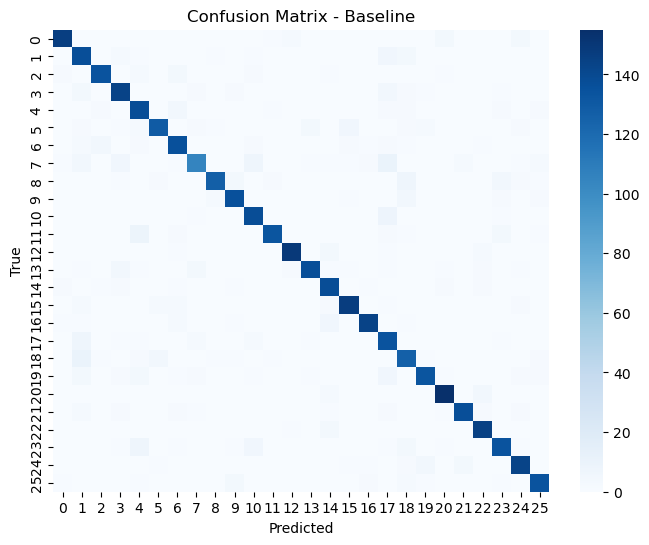

In [12]:
# confusion matrix plot for baseline
cm = confusion_matrix(y_test, y_pred_base)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Baseline")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [13]:
# 9) Manual Random Search for hyperparameters (safe, reproducible, no scikeras)
print("\nStarting manual random search...")

param_grid = {
    'neurons': [32, 64, 128],
    'activation': ['relu', 'tanh'],
    'dropout_rate': [0.2, 0.3, 0.4],
    'learning_rate': [0.001, 0.0005, 0.005]
}


Starting manual random search...


In [14]:

# build all combos then sample a few
all_combinations = list(itertools.product(param_grid['neurons'],
                                          param_grid['activation'],
                                          param_grid['dropout_rate'],
                                          param_grid['learning_rate']))

random.seed(42)
n_iter = 6  # how many random combos to try (adjust as time allows)
sampled = random.sample(all_combinations, min(n_iter, len(all_combinations)))
results = []

In [15]:
for idx, (neurons, activation, dropout_rate, learning_rate) in enumerate(sampled, 1):
    print(f"\nTrial {idx}/{len(sampled)}: neurons={neurons}, activation={activation}, dropout={dropout_rate}, lr={learning_rate}")
    model = build_model(input_dim, num_classes, neurons=neurons, activation=activation, dropout_rate=dropout_rate, learning_rate=learning_rate)
    es = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
    history = model.fit(X_train, y_train, validation_split=0.15, epochs=60, batch_size=32, callbacks=[es], verbose=0)
    # best validation accuracy achieved during training
    val_acc = max(history.history.get('val_accuracy', [0]))
    print(f"  -> best val_accuracy: {val_acc:.4f}")
    results.append({
        'neurons': neurons,
        'activation': activation,
        'dropout_rate': dropout_rate,
        'learning_rate': learning_rate,
        'val_accuracy': val_acc,
        'history': history,
        'model': model
    })


Trial 1/6: neurons=128, activation=relu, dropout=0.3, lr=0.0005


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  -> best val_accuracy: 0.9337

Trial 2/6: neurons=32, activation=relu, dropout=0.4, lr=0.0005
  -> best val_accuracy: 0.7700

Trial 3/6: neurons=32, activation=relu, dropout=0.2, lr=0.0005
  -> best val_accuracy: 0.8279

Trial 4/6: neurons=128, activation=tanh, dropout=0.2, lr=0.005
  -> best val_accuracy: 0.9325

Trial 5/6: neurons=32, activation=tanh, dropout=0.4, lr=0.005
  -> best val_accuracy: 0.7750

Trial 6/6: neurons=32, activation=tanh, dropout=0.4, lr=0.001
  -> best val_accuracy: 0.7746


In [16]:
# choose best hyperparams by val_accuracy
best = max(results, key=lambda x: x['val_accuracy'])
print("\nBest hyperparameters found (manual random search):")
print({k: best[k] for k in ['neurons','activation','dropout_rate','learning_rate','val_accuracy']})


Best hyperparameters found (manual random search):
{'neurons': 128, 'activation': 'relu', 'dropout_rate': 0.3, 'learning_rate': 0.0005, 'val_accuracy': 0.9337499737739563}


In [17]:
# 10) Retrain best model on full training data (optionally increase epochs)
best_model = build_model(input_dim, num_classes,
                         neurons=best['neurons'],
                         activation=best['activation'],
                         dropout_rate=best['dropout_rate'],
                         learning_rate=best['learning_rate'])

es = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
best_hist = best_model.fit(X_train, y_train, validation_split=0.15, epochs=80, batch_size=32, callbacks=[es], verbose=2)


Epoch 1/80


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


425/425 - 4s - 10ms/step - accuracy: 0.3124 - loss: 2.4547 - val_accuracy: 0.6550 - val_loss: 1.4522
Epoch 2/80
425/425 - 2s - 4ms/step - accuracy: 0.5811 - loss: 1.4094 - val_accuracy: 0.7279 - val_loss: 1.0084
Epoch 3/80
425/425 - 2s - 4ms/step - accuracy: 0.6459 - loss: 1.1526 - val_accuracy: 0.7683 - val_loss: 0.8515
Epoch 4/80
425/425 - 2s - 4ms/step - accuracy: 0.6857 - loss: 1.0227 - val_accuracy: 0.7904 - val_loss: 0.7556
Epoch 5/80
425/425 - 2s - 4ms/step - accuracy: 0.7075 - loss: 0.9395 - val_accuracy: 0.8062 - val_loss: 0.6909
Epoch 6/80
425/425 - 2s - 4ms/step - accuracy: 0.7290 - loss: 0.8719 - val_accuracy: 0.8188 - val_loss: 0.6437
Epoch 7/80
425/425 - 3s - 7ms/step - accuracy: 0.7479 - loss: 0.8101 - val_accuracy: 0.8338 - val_loss: 0.6013
Epoch 8/80
425/425 - 2s - 4ms/step - accuracy: 0.7535 - loss: 0.7788 - val_accuracy: 0.8442 - val_loss: 0.5627
Epoch 9/80
425/425 - 2s - 4ms/step - accuracy: 0.7768 - loss: 0.7313 - val_accuracy: 0.8496 - val_loss: 0.5321
Epoch 10/80

In [18]:
# Evaluate best model on test set
y_pred_tuned = np.argmax(best_model.predict(X_test), axis=1)
tuned_acc = accuracy_score(y_test, y_pred_tuned)
print("\nTuned model test accuracy:", tuned_acc)
print("\nTuned model classification report:")
print(classification_report(y_test, y_pred_tuned, target_names=class_names, zero_division=0))


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step   

Tuned model test accuracy: 0.95

Tuned model classification report:
              precision    recall  f1-score   support

           A       0.97      0.99      0.98       158
           B       0.86      0.95      0.90       153
           C       0.97      0.98      0.98       147
           D       0.93      0.97      0.95       161
           E       0.89      0.95      0.92       154
           F       0.97      0.93      0.95       155
           G       0.95      0.94      0.94       155
           H       0.96      0.87      0.91       147
           I       0.97      0.91      0.94       151
           J       0.96      0.97      0.97       149
           K       0.92      0.95      0.94       148
           L       0.97      0.95      0.96       152
           M       1.00      0.96      0.98       158
           N       0.97      0.93      0.95       157
           O       0.95      0.93      0.94       150
           P       0.9

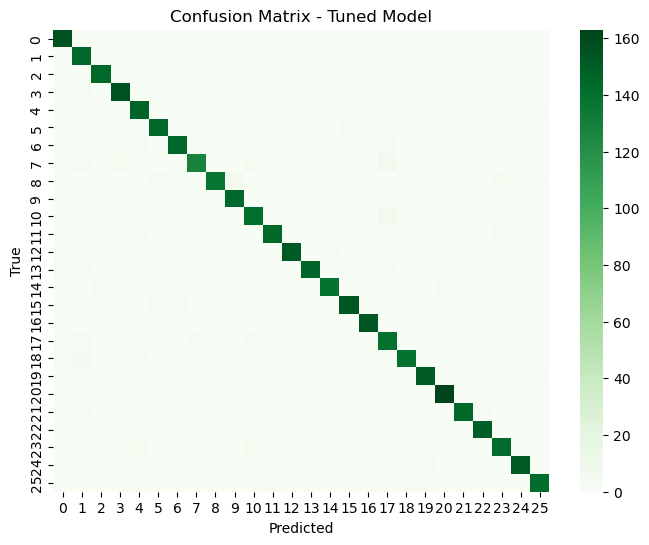

In [19]:
# confusion matrix for tuned model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8,6))
sns.heatmap(cm_tuned, annot=False, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Tuned Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [20]:

# 11) Comparison table & plots
import pandas as pd
comparison = pd.DataFrame({
    'Model': ['Baseline', 'Tuned'],
    'Accuracy': [base_acc, tuned_acc]
})
print("\nModel comparison:")
print(comparison)



Model comparison:
      Model  Accuracy
0  Baseline   0.88975
1     Tuned   0.95000


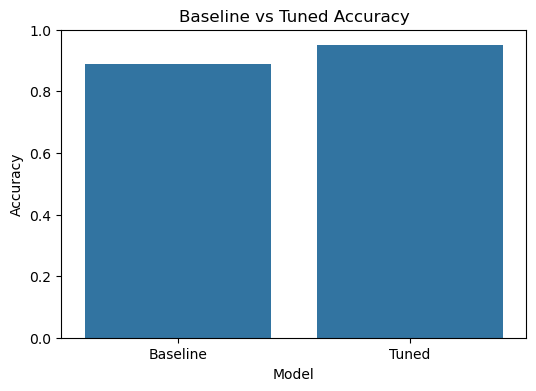

In [21]:
plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='Accuracy', data=comparison)
plt.ylim(0,1)
plt.title("Baseline vs Tuned Accuracy")
plt.show()


In [22]:
# 12) Notes / suggestions to improve (print summary)
print("\n--- Summary & Suggestions ---")
print(f"Baseline accuracy = {base_acc:.4f}")
print(f"Tuned accuracy    = {tuned_acc:.4f}")
print("\nSuggestions to further improve:")
print("- If classes are imbalanced, consider class_weight during training or upsampling small classes.")
print("- Try larger search (increase n_iter) or Bayesian search (Optuna) for better hyperparameters.")
print("- Try deeper networks, BatchNormalization, and data augmentation if applicable.")
print("- If some classes have zero predictions, consider using class weights or focal loss.")



--- Summary & Suggestions ---
Baseline accuracy = 0.8898
Tuned accuracy    = 0.9500

Suggestions to further improve:
- If classes are imbalanced, consider class_weight during training or upsampling small classes.
- Try larger search (increase n_iter) or Bayesian search (Optuna) for better hyperparameters.
- Try deeper networks, BatchNormalization, and data augmentation if applicable.
- If some classes have zero predictions, consider using class weights or focal loss.


***Summary***

In this assignment, we built an Artificial Neural Network (ANN) to classify alphabet data from the Alphabets_data.csv file. The dataset was explored, cleaned, and preprocessed using label encoding and feature scaling. A base ANN model was created and trained for classification, followed by performance evaluation using accuracy and classification metrics. We then performed manual hyperparameter tuning by adjusting neurons, activation functions, dropout rates, and learning rates to improve performance. The tuned model achieved better accuracy, showing how proper preprocessing and parameter optimization enhance ANN-based classification results.